### Import Library

In [76]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

In [77]:
features = pd.read_csv('D:\Decion Making\data\Features data set.csv')
train = pd.read_csv('D:\Decion Making\data\Train.csv')
stores = pd.read_csv('data\stores data-set.csv')
test = pd.read_csv('D:\Decion Making\data\Test.csv')

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [80]:
# changing datatype to datetime format
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [81]:
# Data Exploratory
train['Month']=train['Date'].dt.month
train['Year']=train['Date'].dt.year
train['Dayofweek']=train['Date'].dt.dayofweek

In [82]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
0,1,1,2010-02-05,24924.50,False,2,2010,4
1,1,1,2010-02-12,46039.49,True,2,2010,4
2,1,1,2010-02-19,41595.55,False,2,2010,4
3,1,1,2010-02-26,19403.54,False,2,2010,4
4,1,1,2010-03-05,21827.90,False,3,2010,4


In [83]:
# data Exploratory
test['Month']=test['Date'].dt.month
test['Year']=test['Date'].dt.year
test['Dayofweek']=test['Date'].dt.dayofweek

In [84]:

test.head()

,Store,Dept,Date,IsHoliday,Month,Year,Dayofweek
0,1,1,2012-11-02,False,11,2012,4
1,1,1,2012-11-09,False,11,2012,4
2,1,1,2012-11-16,False,11,2012,4
3,1,1,2012-11-23,True,11,2012,4
4,1,1,2012-11-30,False,11,2012,4


In [85]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
train.set_index('Date',inplace=True)
test.set_index('Date',inplace=True)

In [86]:
# extract out the time-series
sales=train.groupby('Date')['Weekly_Sales'].sum()
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

## Seasonality - Time Series Decomposition
The results represent a pivot table(bảng chéo) which has values that specified as "Weekly Sales" 
and the columns that are determined by the "Year" column in the Dataframe,
and the rows are determined by the "Month" column

In [87]:

monthly_sales = pd.pivot_table(train,values="Weekly_Sales", columns="Year",index="Month")
monthly_sales=monthly_sales.reindex(index=[1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,13997.773991,14252.698030
2,16076.778701,15870.141203,16077.647710
3,15432.626612,15182.972005,15589.875454
4,15745.551340,15361.895495,15890.394983
5,15996.481695,15367.864481,15967.389566
6,16486.250953,16188.124643,16309.247563
7,15972.812718,15724.738313,15893.325343
8,16171.689295,16030.542478,16002.348874
9,15120.086691,14961.570247,15239.205709


<AxesSubplot:xlabel='Month'>

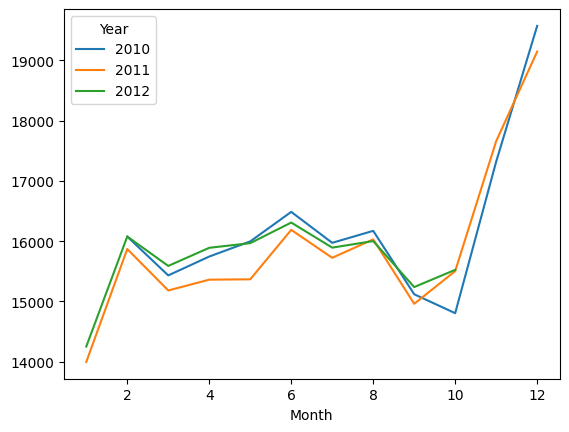

In [88]:
monthly_sales.plot()

We relized that June, November, December are the peak ( đỉnh cao) months for weekly sales and can see a seasonal cycle of 12 months where the mean value of each month starts with a decreasing trend in the beginning of the year and increases towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

## Irregular Remainder ( phần dư bất thường) 

In [89]:
decomposition = sm.tsa.seasonal_decompose(sales, extrapolate_trend=8)

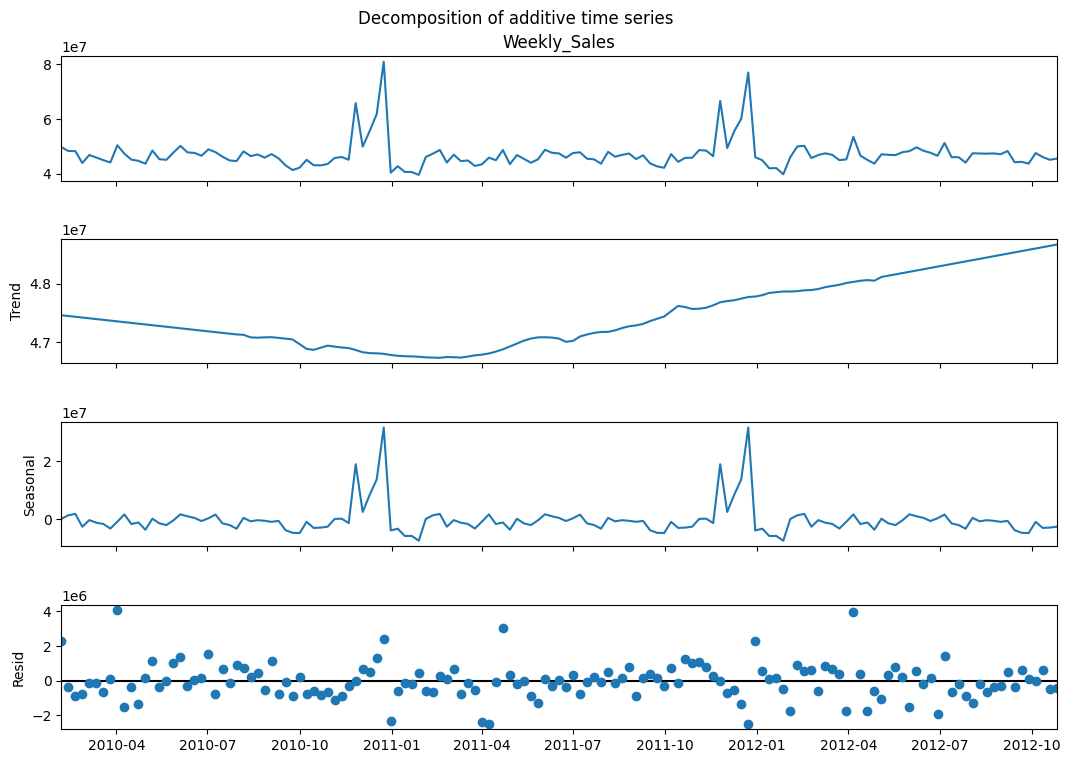

In [90]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [91]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))


In [92]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']

In [93]:
decomp_output

,observed,Trend,Seasonal,Irregular
Date,,,,
2010-02-05,49750740.50,4.746247e+07,2.717348e+02,2.288001e+06
2010-02-12,48336677.63,4.744942e+07,1.234856e+06,-3.475975e+05
2010-02-19,48276993.78,4.743637e+07,1.737900e+06,-8.972774e+05
2010-02-26,43968571.13,4.742332e+07,-2.705045e+06,-7.497064e+05
2010-03-05,46871470.30,4.741027e+07,-4.231219e+05,-1.156816e+05
...,...,...,...,...
2012-09-28,43734899.40,4.857360e+07,-4.910067e+06,7.136779e+04
2012-10-05,47566639.31,4.859558e+07,-1.016989e+06,-1.195188e+04
2012-10-12,46128514.25,4.861756e+07,-3.124785e+06,6.357362e+05


## Stationary Data for ARIMA models

In [94]:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)


(-5.908297957186336,
 2.675979158986003e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

In [95]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


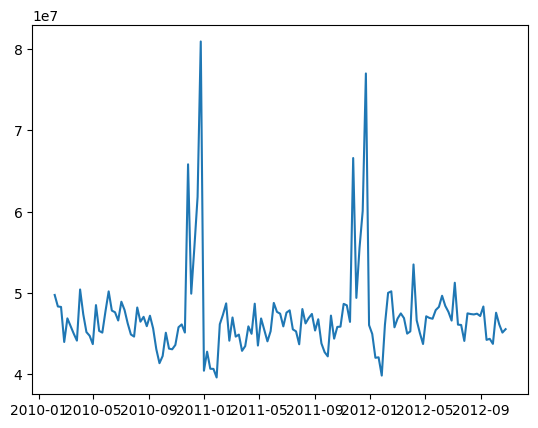

In [96]:
plt.plot(sales)

In [97]:
sales_log = np.log10(sales)

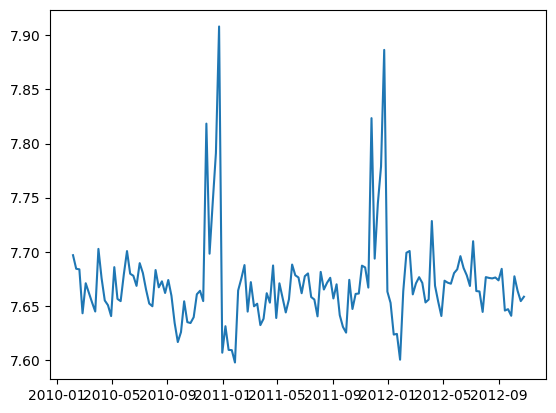

In [98]:
plt.plot(sales_log)

In [99]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


Analysis the result of Dickey Fuller Test 
+ Test Statistic: -5.908297957186336
+ p-value 2.675979158986003e-07 (very small) (This is a value to test stationarity of the time series. If the p-value is smaller than a predefined threshold (usyally 0.05) )

Test Statistic is compared with critical value to check the stationarity of the time series. If Test Statistic less than Critical Value, the time series is stable. With this time series, it is stable.


In [100]:
sales.diff(1).head()

Date
2010-02-05           NaN
2010-02-12   -1414062.87
2010-02-19     -59683.85
2010-02-26   -4308422.65
2010-03-05    2902899.17
Name: Weekly_Sales, dtype: float64

In [101]:
sales_diff1 = sales.diff(1)
sales_diff1.dropna(inplace=True)

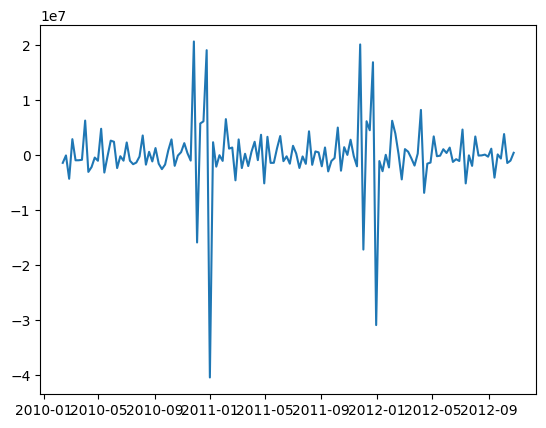

In [102]:
plt.plot(sales_diff1)

In [103]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.699469e+00
p-value                        3.922579e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


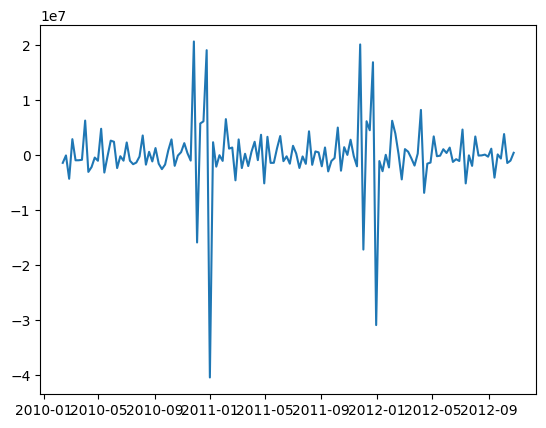

In [104]:

plt.plot(sales_diff1)

The following are some of my key observations from this analysis:

1, Trend: 12 months moving average look quite similar to a straitght line so we could have easly used linear regression to estimate the trend in this data

2, Seasonality: As discussed, seasonal plot displays a fairly consistent month-on-month pattern. ( nhất quán theo tháng)

$Seasonality_{t} ×Remainder_{t}=Y_{t}-Trend_{t}$


​


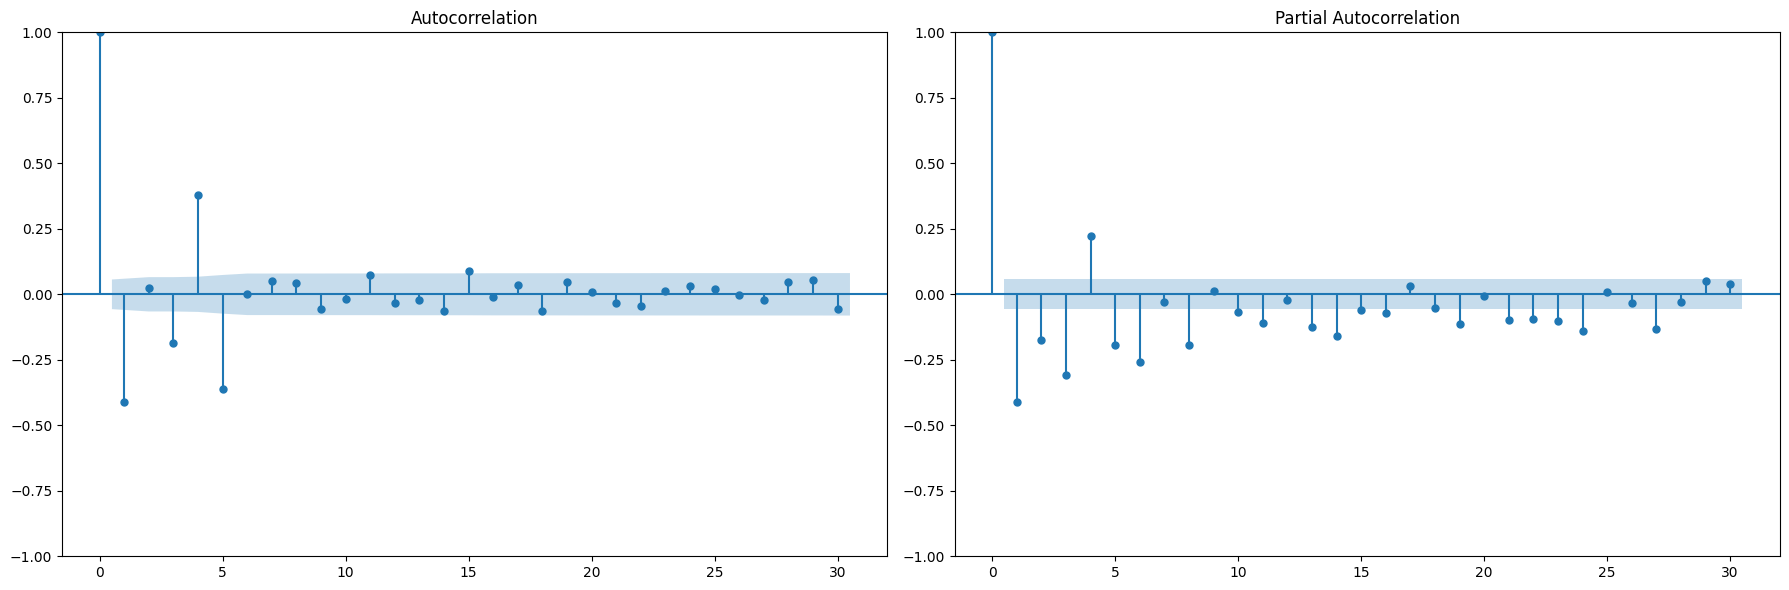

In [105]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_diff1, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_diff1, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

In [106]:
model = sm.tsa.statespace.SARIMAX(sales_diff1, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [107]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  142
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood               -2181.181
Date:                             Tue, 30 May 2023   AIC                           4370.362
Time:                                     01:15:02   BIC                           4381.801
Sample:                                 02-12-2010   HQIC                          4375.010
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3748      0.043      8.707      0.000       0.290       0.459
ma.L1         -1.0027      

#### Iterate the process to find the best values for p, d, q and P, D, Q

In [108]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [109]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [110]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [111]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX {} x {} 12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX (1, 1, 1) x (0, 0, 0, 12) 12 model - AIC:-492.97140316329273


### Predict sales using the best fit ARIMA model

In [112]:
best_model=sm.tsa.statespace.SARIMAX(sales_log,order=(1, 1, 1),seasonal_order=(0, 0, 0, 12) ,enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results=best_model.fit()

In [113]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 249.486
Date:                Tue, 30 May 2023   AIC                           -492.971
Time:                        01:15:20   BIC                           -484.146
Sample:                    02-05-2010   HQIC                          -489.385
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3754      0.048      7.743      0.000       0.280       0.470
ma.L1         -1.0000    135.893     -0.007      0.994    -267.345     265.345
sigma2         0.0016      0.219      0.007      0.9

In [114]:
sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [115]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)

In [116]:
pred_dynamic.predicted_mean

2012-09-14    7.676190
2012-09-21    7.661497
2012-09-28    7.661864
2012-10-05    7.659417
2012-10-12    7.673239
2012-10-19    7.668168
2012-10-26    7.664474
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [117]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [118]:
actual = sales['2012-09-14':]
actual

Date
2012-09-14    44226038.65
2012-09-21    44354547.11
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, dtype: float64

In [119]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)
MAPE_last1year

0.03780830326472228

In [120]:

print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0378


In [121]:
# Compute the mean square error 
mse= ((actual-forecast)** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,4)))
print("The Root Mean Squared Error is {}".format(np.sqrt(round(mse,4))))

The Mean Squared Error of our forecasts is 3507660751037.7
The Root Mean Squared Error is 1872874.9961056397


In [122]:

np.power(10, best_results.forecast(steps=12))

2012-11-02    4.633921e+07
2012-11-09    4.664127e+07
2012-11-16    4.675518e+07
2012-11-23    4.679801e+07
2012-11-30    4.681410e+07
2012-12-07    4.682015e+07
2012-12-14    4.682241e+07
2012-12-21    4.682327e+07
2012-12-28    4.682359e+07
2013-01-04    4.682371e+07
2013-01-11    4.682375e+07
2013-01-18    4.682377e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

### Forecast sales using the best fit ARIMA model
The next step is to predict weekly sales for next 3 years i.e. for 2013, 2014, and 2015 through the above model.


In [123]:
n_steps = 36
# Get forecast 36 steps (3 years) ahead in future

pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals (khoảng tin cậy) 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [124]:

pred_ci_99.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587073,7.744824
2012-11-09,7.584326,7.753215
2012-11-16,7.584558,7.755102
2012-11-23,7.584813,7.755642
2012-11-30,7.584932,7.755822


In [125]:

pred_ci_95.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587073,7.744824
2012-11-09,7.584326,7.753215
2012-11-16,7.584558,7.755102
2012-11-23,7.584813,7.755642
2012-11-30,7.584932,7.755822


In [126]:
n_steps=36
idx=pd.date_range(sales.index[-1],periods=n_steps,freq='MS')
# This function create a series which have begin date =[date]-1 -  the final date in the time series, 
# kéo dài n_steps, frequences = MS 
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])


In [127]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,4.633921e+07,3.864320e+07,5.556792e+07,3.864320e+07,5.556792e+07
2012-12-01,4.664127e+07,3.839954e+07,5.665193e+07,3.839954e+07,5.665193e+07
2013-01-01,4.675518e+07,3.842004e+07,5.689860e+07,3.842004e+07,5.689860e+07
2013-02-01,4.679801e+07,3.844258e+07,5.696948e+07,3.844258e+07,5.696948e+07
2013-03-01,4.681410e+07,3.845312e+07,5.699304e+07,3.845312e+07,5.699304e+07


In [128]:
pd.plotting.register_matplotlib_converters()

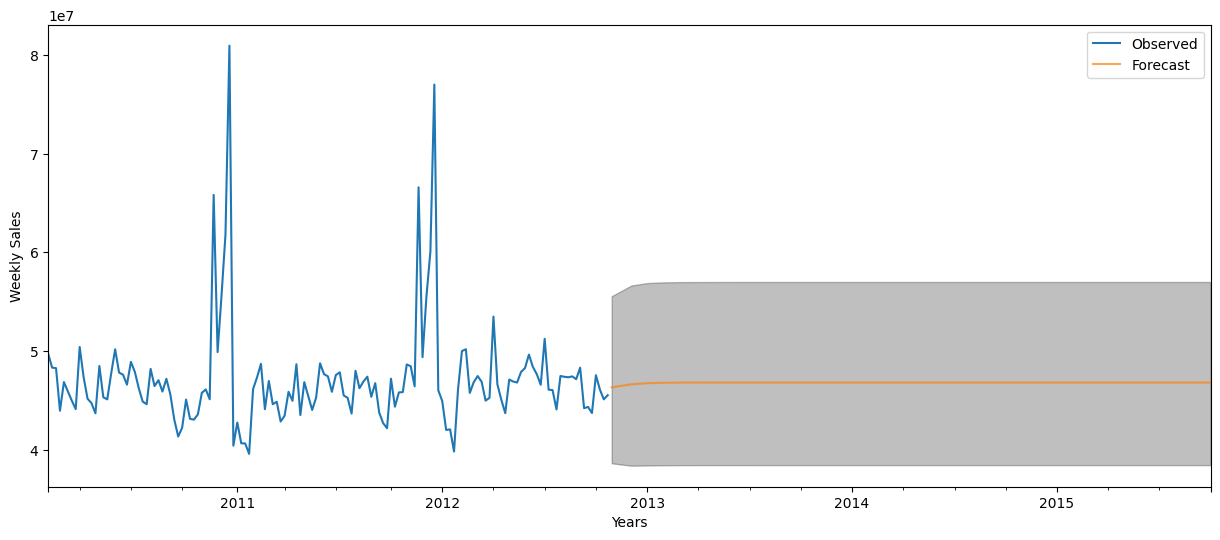

In [129]:
# plot the forecast along with the confidence band
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

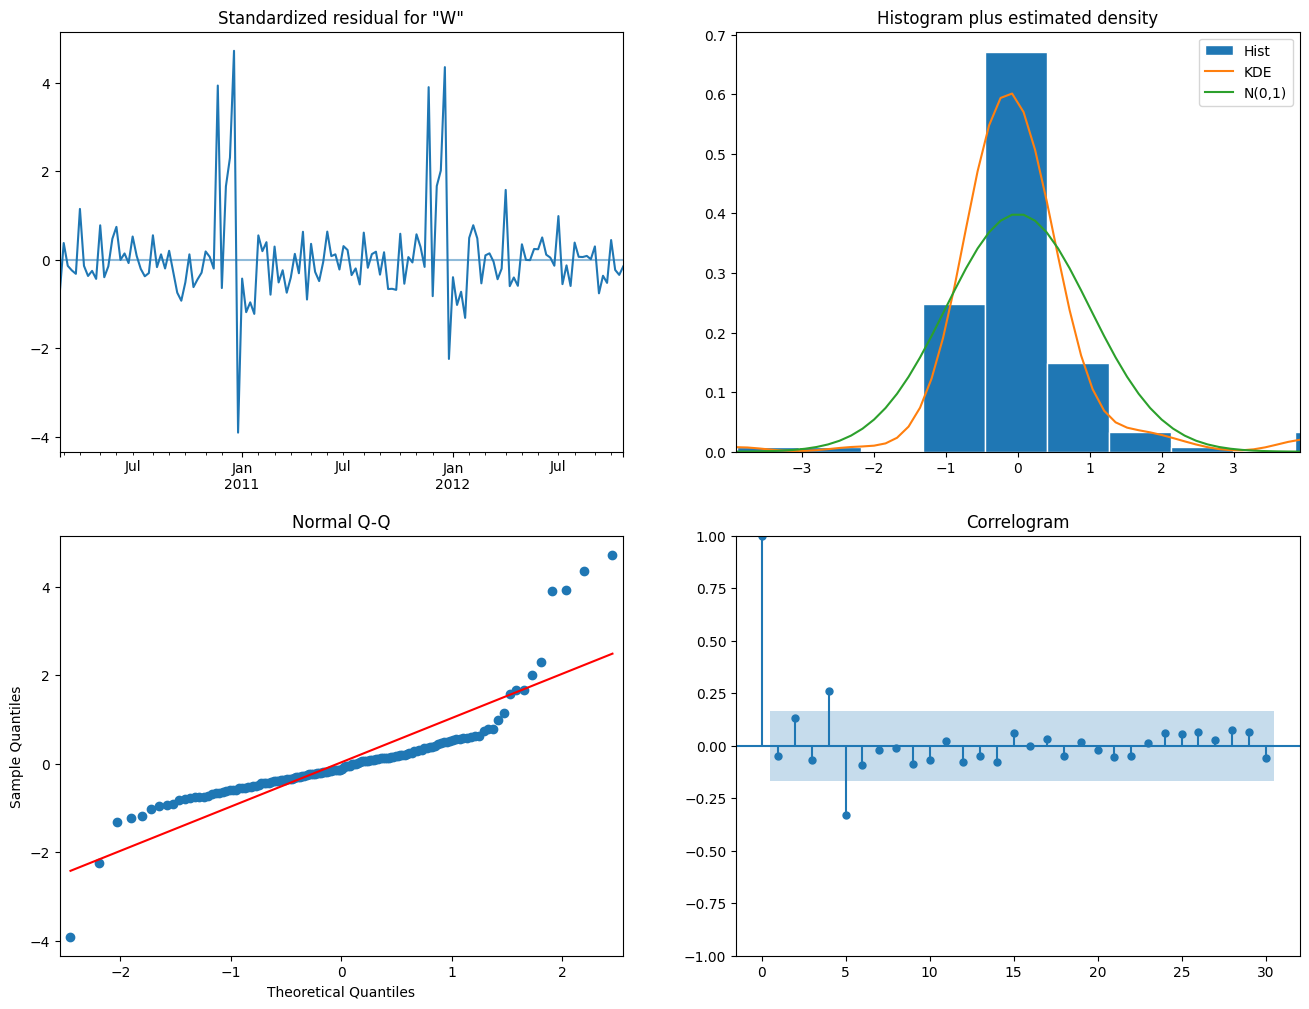

In [130]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

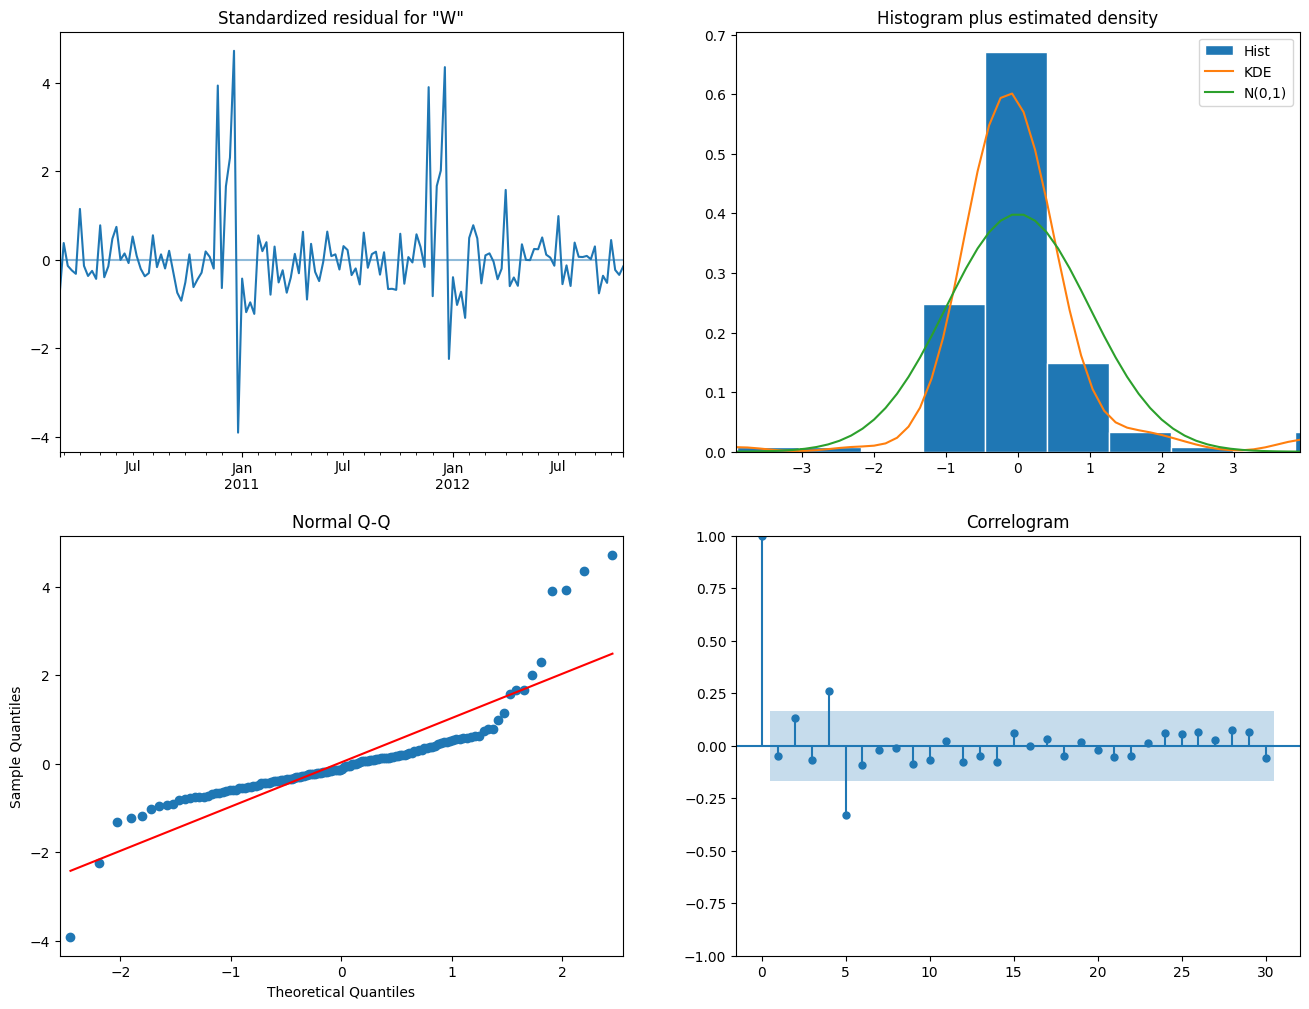

In [131]:
a = best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show(a)